In [ ]:
#In this script, I apply simple methods in leap frog integration

import numpy as np
import matplotlib.pyplot as plt
  import math



The Boris–Buneman algorithm simulation you provided is designed to simulate the motion of a charged particle under the influence of uniform electric and magnetic fields. This physical situation is commonly encountered in plasma physics, astrophysics, and various applications in electromagnetism. Here’s a more detailed explanation of the physical scenario being simulated:

### Physical Scenario: Charged Particle in Uniform Electromagnetic Fields

#### Key Elements:

1. **Charged Particle**:
   - The particle has a charge \( q \) and a mass \( m \).
   - The initial conditions specify the starting position and velocity of the particle.

2. **Uniform Electric Field (\( \mathbf{E} \))**:
   - The electric field is constant in both magnitude and direction.
   - It exerts a force \( \mathbf{F}_E = q \mathbf{E} \) on the particle, causing linear acceleration in the direction of the field.

3. **Uniform Magnetic Field (\( \mathbf{B} \))**:
   - The magnetic field is also constant in both magnitude and direction.
   - It exerts a Lorentz force \( \mathbf{F}_B = q (\mathbf{v} \times \mathbf{B}) \) on the particle, causing it to undergo circular or helical motion depending on the orientation of the velocity relative to the magnetic field.

#### Dynamics:

- **Electric Field**: The electric field accelerates the particle in its direction. If the electric field is aligned with the initial velocity, the particle will speed up linearly. If perpendicular, it will cause a parabolic trajectory.

- **Magnetic Field**: The magnetic field causes the particle to move in a circular path if its initial velocity is perpendicular to the field. If the velocity has components both perpendicular and parallel to the magnetic field, the particle will follow a helical trajectory.

- **Combined Fields**: When both fields are present, the particle experiences both linear acceleration (due to the electric field) and circular motion (due to the magnetic field). The resulting motion is a superposition of these effects, leading to more complex trajectories.

### Practical Applications:

1. **Plasma Confinement in Fusion Reactors**:
   - In devices like tokamaks and stellarators, charged particles (ions and electrons) are confined using strong magnetic fields. Understanding their motion helps in optimizing confinement and stability.

2. **Astrophysical Phenomena**:
   - In space, charged particles from the sun (solar wind) interact with the Earth's magnetic field, leading to phenomena like the auroras (Northern and Southern Lights).

3. **Particle Accelerators**:
   - Understanding the motion of charged particles in electromagnetic fields is crucial for the design and operation of particle accelerators, which are used in research and medical applications.

### Example Situation: Electron in a Crossed Electric and Magnetic Field

Consider an electron with charge \( q = -e \) and mass \( m = m_e \), placed in a uniform electric field \( \mathbf{E} \) and a uniform magnetic field \( \mathbf{B} \). If the electric field is directed along the \( z \)-axis and the magnetic field along the \( y \)-axis, the initial velocity of the electron could be along the \( x \)-axis. The resulting motion would be a combination of acceleration in the \( z \)-direction (due to the electric field) and circular motion in the \( x \)-\( z \) plane (due to the magnetic field).

### Summary

The Boris–Buneman algorithm efficiently handles the integration of the equations of motion for charged particles in electromagnetic fields by separating the effects of electric and magnetic fields. The provided simulation demonstrates this for a charged particle in uniform fields, illustrating key physical phenomena relevant to plasma physics, astrophysics, and electromagnetic theory.

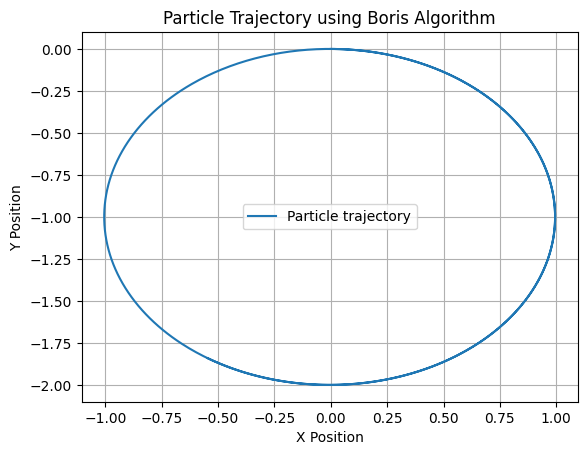

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
q = 1.0  # Charge of the particle
m = 1.0  # Mass of the particle
dt = 0.01  # Time step
t_max = 10  # Maximum time
E = np.array([0.0, 0.0, 1.0])  # Electric field
B = np.array([0.0, 0.0, 1.0])  # Magnetic field

# Time array
t = np.arange(0, t_max, dt)

# Position and velocity arrays
x = np.zeros((len(t), 3))
v = np.zeros((len(t), 3))

# Initial conditions
x[0] = [0.0, 0.0, 0.0]  # Initial position
v[0] = [1.0, 0.0, 0.0]  # Initial velocity

# Boris algorithm
for i in range(len(t) - 1):
    # Half-step electric field acceleration
    v_minus = v[i] + (q * E / m) * (dt / 2)

    # Magnetic field rotation
    T = (q * B / m) * (dt / 2)
    T_magnitude = np.linalg.norm(T)
    S = 2 * T / (1 + T_magnitude**2)

    v_prime = v_minus + np.cross(v_minus, T)
    v_plus = v_minus + np.cross(v_prime, S)

    # Half-step electric field acceleration
    v[i + 1] = v_plus + (q * E / m) * (dt / 2)

    # Position update
    x[i + 1] = x[i] + v[i + 1] * dt

# Plotting the results
plt.plot(x[:, 0], x[:, 1], label='Particle trajectory')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.legend()
plt.title('Particle Trajectory using Boris Algorithm')
plt.grid(True)
plt.show()


